**Data Analysis with Python


In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Download dataset through Kaggle API
import kagglehub

# Download latest version
path = kagglehub.dataset_download("willianoliveiragibin/electric-vehicle-population")

print("Path to dataset files:", path)

100%|██████████| 4.71M/4.71M [00:00<00:00, 6.67MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/willianoliveiragibin/electric-vehicle-population/versions/1


In [3]:
#Store and load the dataset
file_path = path + "/Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(file_path)
df.head()

VIN (1-10)    County      City State  Postal Code  Model Year     Make  \
0  KM8K33AGXL      King   Seattle    WA      98103.0        2020  HYUNDAI   
1  1C4RJYB61N      King   Bothell    WA      98011.0        2022     JEEP   
2  1C4RJYD61P    Yakima    Yakima    WA      98908.0        2023     JEEP   
3  5YJ3E1EA7J      King  Kirkland    WA      98034.0        2018    TESLA   
4  WBY7Z8C5XJ  Thurston   Olympia    WA      98501.0        2018      BMW   

            Model                   Electric Vehicle Type  \
0            KONA          Battery Electric Vehicle (BEV)   
1  GRAND CHEROKEE  Plug-in Hybrid Electric Vehicle (PHEV)   
2  GRAND CHEROKEE  Plug-in Hybrid Electric Vehicle (PHEV)   
3         MODEL 3          Battery Electric Vehicle (BEV)   
4              I3  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible             258   
1             Not eligible due to low battery range              25   
2             Not eligible due to low battery range              25   
3           Clean Alternative Fuel Vehicle Eligible             215   
4           Clean Alternative Fuel Vehicle Eligible              97   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                  43.0       249675142   
1          0                   1.0       233928502   
2          0                  14.0       229675939   
3          0                  45.0       104714466   
4          0                  22.0       185498386   

                  Vehicle Location  \
0     POINT (-122.34301 47.659185)   
1     POINT (-122.20578 47.762405)   
2  POINT (-120.6027202 46.5965625)   
3     POINT (-122.209285 47.71124)   
4     POINT (-122.89692 47.043535)   

                                Electric Utility  2020 Census Tract  
0   CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303300e+10  
1  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303302e+10  
2                                     PACIFICORP       5.307700e+10  
3  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303302e+10  
4                         PUGET SOUND ENERGY INC       5.306701e+10

Explolatory Data Analysis


In [4]:
df.shape

(150482, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150482 non-null  object 
 1   County                                             150479 non-null  object 
 2   City                                               150479 non-null  object 
 3   State                                              150482 non-null  object 
 4   Postal Code                                        150479 non-null  float64
 5   Model Year                                         150482 non-null  int64  
 6   Make                                               150482 non-null  object 
 7   Model                                              150482 non-null  object 
 8   Electric Vehicle Type                              150482 non-null  object

In [6]:
#converting dtype of Postal Code

df['Postal Code'] = df['Postal Code'].astype(str)
df['Postal Code'] = df['Postal Code'].str.replace( '.0', '')
df['Postal Code']

print(df['Postal Code'])

0         98103
1         98011
2         98908
3         98034
4         98501
          ...  
150477    98563
150478    98104
150479    98109
150480    98043
150481    98273
Name: Postal Code, Length: 150482, dtype: object


In [7]:
df.describe()

Model Year  Electric Range      Base MSRP  Legislative District  \
count  150482.000000   150482.000000  150482.000000         150141.000000   
mean     2020.005436       67.877839    1312.644735             29.343950   
std         3.015209       96.230009    9231.310215             14.824829   
min      1997.000000        0.000000       0.000000              1.000000   
25%      2018.000000        0.000000       0.000000             18.000000   
50%      2021.000000       18.000000       0.000000             33.000000   
75%      2023.000000       97.000000       0.000000             43.000000   
max      2024.000000      337.000000  845000.000000             49.000000   

       DOL Vehicle ID  2020 Census Tract  
count    1.504820e+05       1.504790e+05  
mean     2.111122e+08       5.297195e+10  
std      8.196388e+07       1.638841e+09  
min      4.385000e+03       1.081042e+09  
25%      1.693473e+08       5.303301e+10  
50%      2.150306e+08       5.303303e+10  
75%      2.399119e+08       5.305307e+10  
max      4.792548e+08       5.603300e+10

In [8]:
#convert last three numeric columns to categorical, as they are not continuos numerical
df['Legislative District'] = df['Legislative District'].astype('category')
df['DOL Vehicle ID'] = df['DOL Vehicle ID'].astype('category')
df['2020 Census Tract'] = df['2020 Census Tract'].astype('category')

df.describe()

Model Year  Electric Range      Base MSRP
count  150482.000000   150482.000000  150482.000000
mean     2020.005436       67.877839    1312.644735
std         3.015209       96.230009    9231.310215
min      1997.000000        0.000000       0.000000
25%      2018.000000        0.000000       0.000000
50%      2021.000000       18.000000       0.000000
75%      2023.000000       97.000000       0.000000
max      2024.000000      337.000000  845000.000000

In [9]:
#indentify mising values or inconsistencies in the dataset
missing_values = df.isnull().sum()
print(missing_values)

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 341
DOL Vehicle ID                                         0
Vehicle Location                                       7
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64


In [10]:
missing_percantage = (missing_values / len(df)) * 100
formatted_percentage = missing_percantage.apply(lambda x: f'{x:.2f}')
print(formatted_percentage)

VIN (1-10)                                           0.00
County                                               0.00
City                                                 0.00
State                                                0.00
Postal Code                                          0.00
Model Year                                           0.00
Make                                                 0.00
Model                                                0.00
Electric Vehicle Type                                0.00
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.00
Electric Range                                       0.00
Base MSRP                                            0.00
Legislative District                                 0.23
DOL Vehicle ID                                       0.00
Vehicle Location                                     0.00
Electric Utility                                     0.00
2020 Census Tract                                    0.00
dtype: object


We have non-null values at our dataset, except for 0.23% null values of DOL Vehicle ID, which is OK! We could use the first columns for registered location of each vehicle.


In [11]:
#check for inconsinstence data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   VIN (1-10)                                         150482 non-null  object  
 1   County                                             150479 non-null  object  
 2   City                                               150479 non-null  object  
 3   State                                              150482 non-null  object  
 4   Postal Code                                        150482 non-null  object  
 5   Model Year                                         150482 non-null  int64   
 6   Make                                               150482 non-null  object  
 7   Model                                              150482 non-null  object  
 8   Electric Vehicle Type                              150482 non-nu

Heatmap to review NaN-values

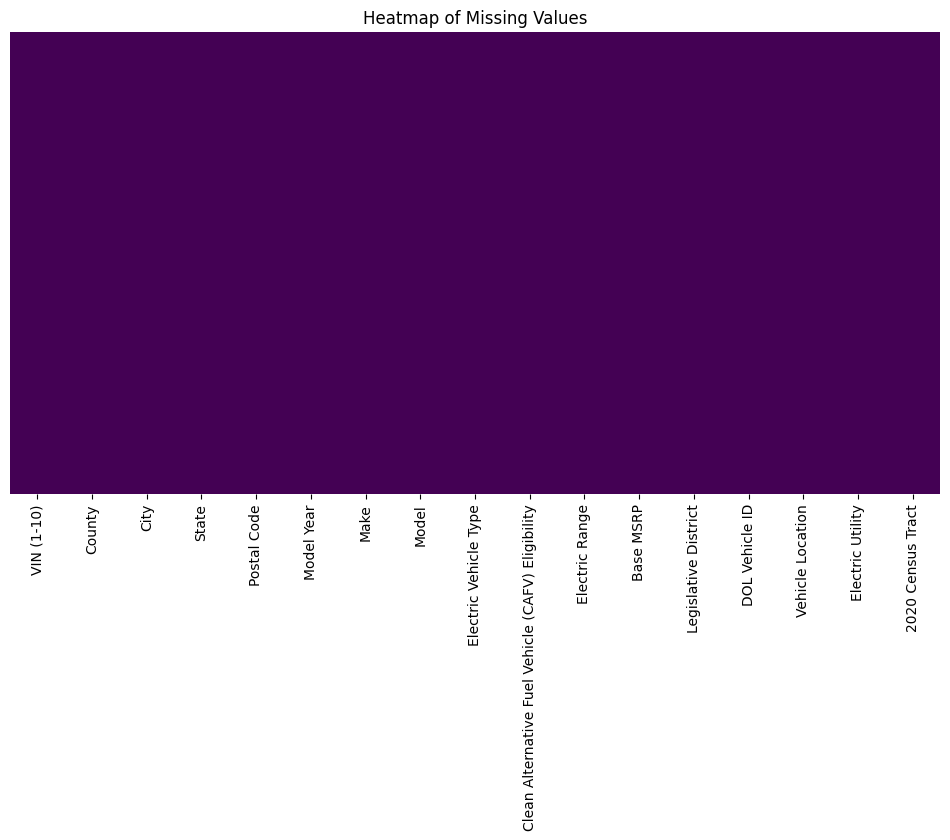

In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

Distribution Analysis


<ipython-input-13-db24466965e0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Model Year'], kde = True)


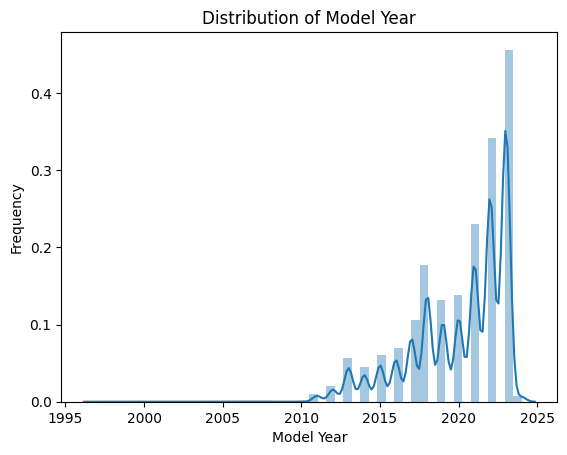

In [13]:
sns.distplot(df['Model Year'], kde = True)
plt.title('Distribution of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.show()

From Distribution of Model Year -the majority of EVs are produced after 2010 with increasing uptrend from 2015. We have small Peak at 2018 and a burst boom in the last 3 years(2021–2023). From this visualization, we can see some distribution of values around 2000 and 1995, which are noticable inconsistent from the majority of data. This could be from data entry errors, invalid data as outliers or old electric/hybrid vehicles.


In [14]:
# checking the earliest models
print("Count of Models before 2010:")
print(df[df['Model Year'] < 2010].groupby(['Model Year', 'Model']).size().sort_index())

Count of Models before 2010:
Model Year  Model      
1997        S-10 PICKUP     1
1998        RANGER          1
1999        RANGER          4
2000        RANGER          8
2002        RAV4            2
2003        RAV4            1
2008        ROADSTER       19
dtype: int64


We could review these models and their production as interesting point of contorl, for our analysis we assume these models and their data is valid in our dataset.

<ipython-input-15-1a814dfe74a4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Base MSRP'], kde = True)


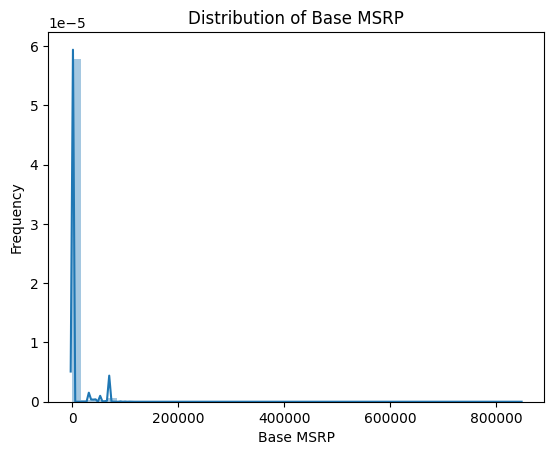

In [15]:
sns.distplot(df['Base MSRP'], kde = True)
plt.title('Distribution of Base MSRP')
plt.xlabel('Base MSRP')
plt.ylabel('Frequency')
plt.show()

We don't have many information regarding Base MSRP. As we have a majority as values at zero. So, we will analyze what percentange of the whole column we have zeros


In [16]:
base_zeros = (df['Base MSRP'] == 0).sum() / len(df) * 100
print(f'Percentage of zeros in Base MSRP: {base_zeros:.2f}%')


Percentage of zeros in Base MSRP: 97.70%


We have almost 98% zeros in our column ''Base MSRP'', so in our dataset we don't have information what is the base price w/o additional feauture of EV Vehicles. With this missing values at Base MSRP we could not perform any further statistical analysist cost related, as we have missing and incomplete data.

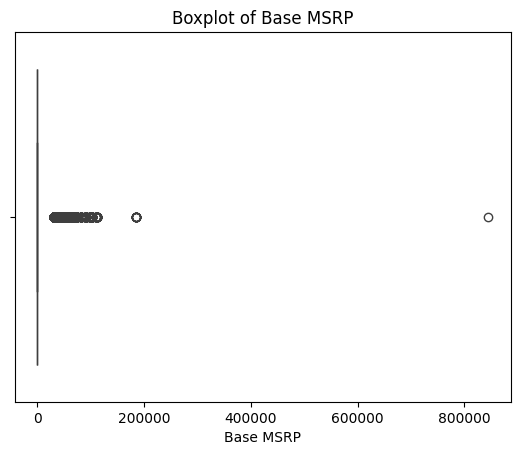

In [17]:
sns.boxplot(x=df['Base MSRP'])
plt.title('Boxplot of Base MSRP')
plt.xlabel('Base MSRP')
plt.show()

The box plot visualize our extreme skewness with most zero values. Including these values will disort next statistical analysis (correlation, mean, IQR, regression).

<ipython-input-18-58a893263332>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Electric Range'], kde = True)


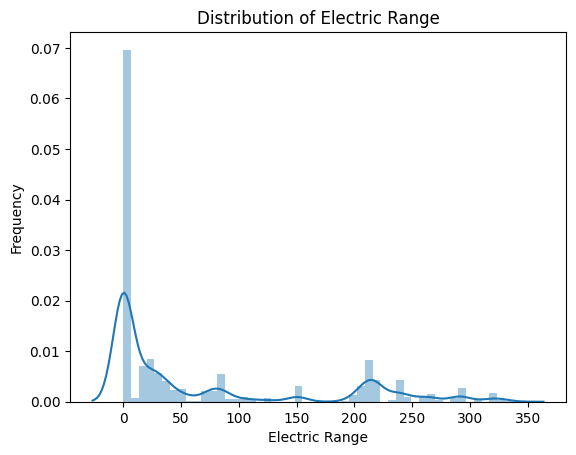

In [18]:
sns.distplot(df['Electric Range'], kde = True)
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.show()

In [19]:
range_zeros = (df['Electric Range'] == 0).sum() / len(df) * 100
print(f'Percentage of zeros in Electric Range: {range_zeros:.2f}%')

Percentage of zeros in Electric Range: 46.32%


Data in Electric Range is highly missing around 46 % of the whole data. Electric Range of Zeros is realistic impossible, so we assume our data is not valid. We could drop these rows with zeros in Electric range. The data with highly extremes skewness around zero will disort once again our stastistical measures, regression models. We will perform our statistical analysis on a data sample where the data is valid, full and realistic. And our conclusions from statistical test will be defines the whole electric vehicle population based on Central Limit Theory.

Create an clean datafram w/o 0s to perform our statistical analysis on a smaller sample for our dataset.

In [20]:
df_cleaned = df[(df['Base MSRP'] > 0) & (df['Electric Range'] > 0)].copy()

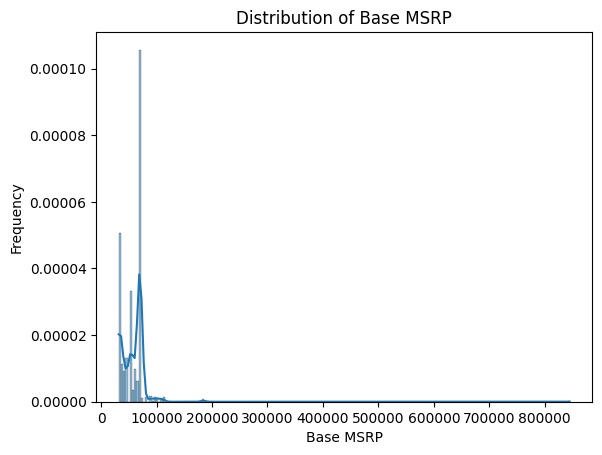

In [21]:
sns.histplot(df_cleaned['Base MSRP'], kde=True, stat='density')
plt.title('Distribution of Base MSRP')
plt.xlabel('Base MSRP')
plt.ylabel('Frequency')
plt.show()


After cleaning of our data, on the distribution of analysis for Base MSRP, we could see the same right skewness of data, but now we can confirm the clustered peak around 50K$ and second highest peak with majority of data around 100K$ Base MSRP. The right skew is showing an exceptional data around 800K$, which is telling us for an extreme luxury electric vehicle.


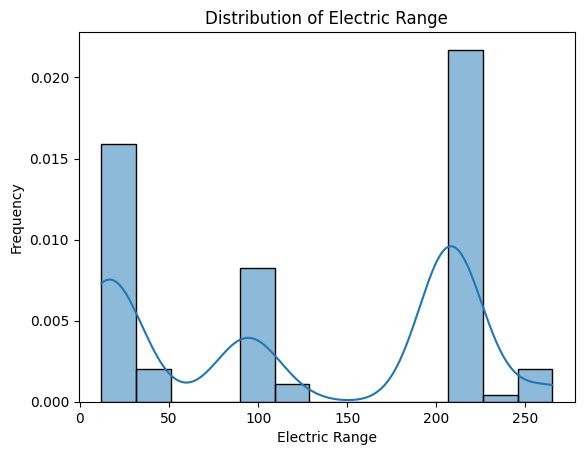

In [22]:
sns.histplot(df_cleaned['Electric Range'], kde=True, stat='density')
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.show()


After cleaning the zeros of Electric Range, we are able to see more informative our distribution. Electric Range varies between 20/30 to 200/250, clustered with 2 high peaks - at 30 and 200kms. The clustering of our data could be formed based on the model of EVs, which could be analyzed in a ML algorithm for EVs Model Segmentation by Electric Range.

Outlier Detection Analaysis

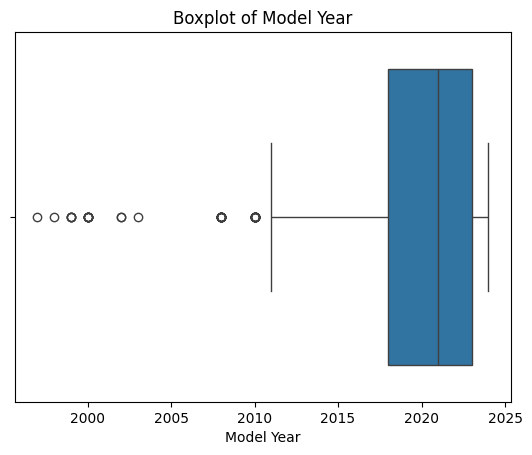

In [23]:
sns.boxplot(x=df['Model Year'])
plt.title('Boxplot of Model Year')
plt.xlabel('Model Year')
plt.show()

From the boxplot visualization, we can see the majority of moodel years are produced between 2010 ana 2025. The main part are increasing from 2018, where are lower border of our box is formed with increasing size until 2024. With mean value around 2022/2023.

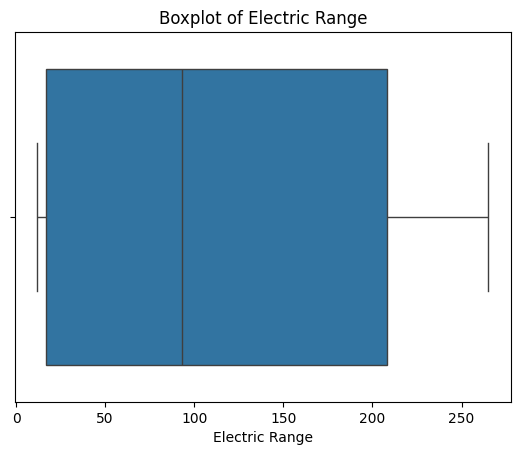

In [24]:
sns.boxplot(x=df_cleaned['Electric Range'])
plt.title('Boxplot of Electric Range')
plt.xlabel('Electric Range')
plt.show()

From the boxplot visualization we can identify IQR range which is formed from 30/40 until 200. This is our majority of EVs with this Electric Range. The whisker of our box plot are formed with extentention until 250 and showing an outliers with extreme long Electric range. This is our outliers form our data above 250 ELectric Range, which are extreme premium last model EVs like TESLA.

Correlation Matrix

we will use our cleaned data for our correlation analysis

In [25]:
#filter on numerical columns from our dataset to perform correlation analysis

df_numeric = df_cleaned.select_dtypes(include=[np.number])

In [26]:
df_numeric.head()

Model Year  Electric Range  Base MSRP
68         2013             208      69900
70         2013             208      69900
90         2014             208      69900
143        2016              93      31950
149        2016              93      31950

In [27]:
df_numeric.corr(method='pearson')

Model Year  Electric Range  Base MSRP
Model Year        1.000000       -0.930523  -0.469958
Electric Range   -0.930523        1.000000   0.407856
Base MSRP        -0.469958        0.407856   1.000000

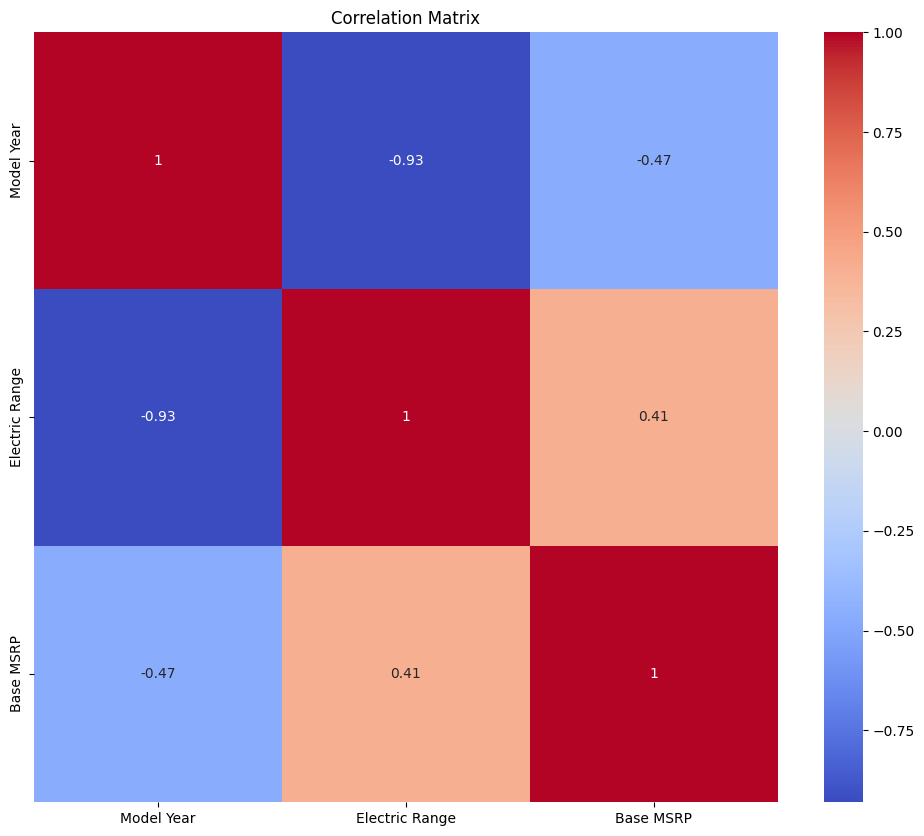

In [28]:
plt.subplots(figsize=(12, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

From the correlation matrix we can conclude that Electric Range with Model Yeare have a strong negative correlation coeffiecient. This means the EVs are producing with short to mid-range Electric range with increasing of Model Year. Manufacturers are producing more EVs for city ranges, rather than long intercity ranges.
Base MRSP with Model Year have -0.47 Correlation coefficient, which is showing negative moderate corellation, which is telling us the newest produced EVs have a lower base MSRP for production.
Base MSRP and Electric Range is showing a positive moderate correlation coefficient with 0.41, which could be interpretated as EVs with longer Electric Range tend to have higher base production prices.

Cardinality

In [31]:
#filter categorical columns for cardinality analysis
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location',
       'Electric Utility'],
      dtype='object')


In [32]:
#calculating unique values
unique_values = df[object_columns].nunique()
print(unique_values)

VIN (1-10)                                           9529
County                                                183
City                                                  683
State                                                  41
Postal Code                                           824
Make                                                   37
Model                                                 127
Electric Vehicle Type                                   2
Clean Alternative Fuel Vehicle (CAFV) Eligibility       3
Vehicle Location                                      822
Electric Utility                                       76
dtype: int64


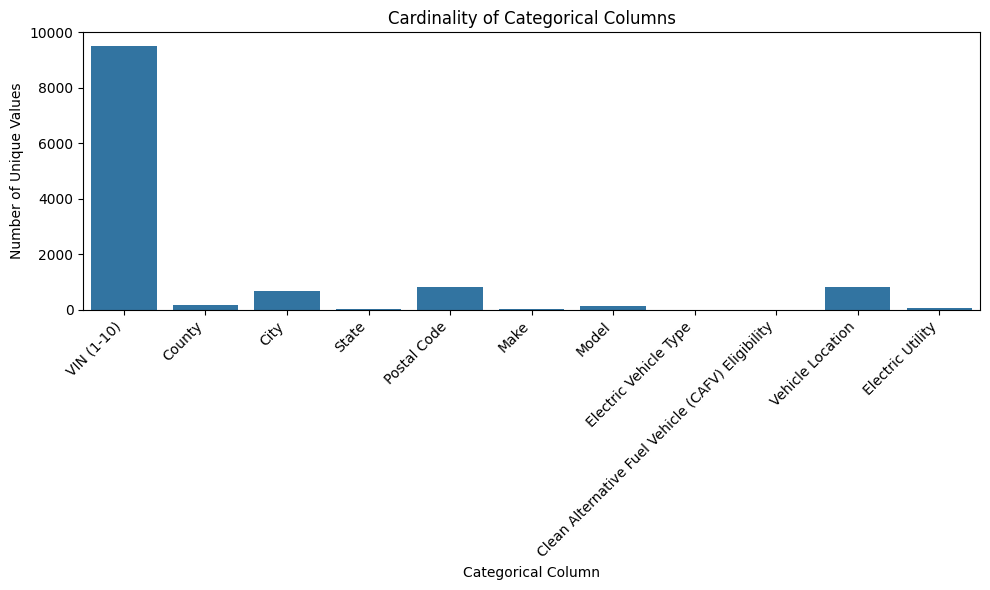

In [33]:
#visualize the cardinality
plt.figure(figsize=(10, 6))
sns.barplot(x=unique_values.index, y=unique_values.values)
plt.title('Cardinality of Categorical Columns')
plt.xlabel('Categorical Column')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Data Profiling with Ydata Profiling

In [34]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f2abc391cd0c29a210d85d324a40582f382179ef4c2c572201c0a711ca8d77b9
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [35]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report")


In [36]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 17/17 [00:18<00:00,  1.10s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Data Profiling Tools - Alternatives

In [37]:
!pip install skimpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 6.17.1
    Uninstalling ipykernel-6.17.1:
      Successfully uninstalled ipykernel-6.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==6.17.1, but you have ipykernel 6.29.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible

skimpy is a light weight tool that provides summary statistics about variables in pandas or Polars data frames within the console or your interactive Python window.

In [38]:
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 150482 │ │ string      │ 11    │ │ Legislative District  │                                │
│ │ Number of columns │ 17     │ │ int64       │ 3     │ │ DOL Vehicle ID        │                                │
│ └───────────────────┴────────┘ │ category    │ 3     │ │ 2020 Census Tract     │                                │
│                                └─────────────┴───────┘ └───────────────────────┘                                │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column             ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0     ┃ p25   ┃ p50   ┃ p75   ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ Model Year         │   0 │      0 │    2020 │   3.015 │   1997 │  2018 │  2021 │  2023 │    2024 │    ▁▄█  │  │
│ │ Electric Range     │   0 │      0 │   67.88 │   96.23 │      0 │     0 │    18 │    97 │     337 │  █▁ ▁▁  │  │
│ │ Base MSRP          │   0 │      0 │    1313 │    9231 │      0 │     0 │     0 │     0 │  845000 │    █    │  │
│ └────────────────────┴─────┴────────┴─────────┴─────────┴────────┴───────┴───────┴───────┴─────────┴─────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃ column                            ┃ NA     ┃ NA %                              ┃ ordered      ┃ unique     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ Legislative District              │    341 │               0.22660517536981167 │ False        │         50 │  │
│ │ DOL Vehicle ID                    │      0 │                                 0 │ False        │     150482 │  │
│ │ 2020 Census Tract                 │      3 │              0.001993593918209487 │ False        │       2080 │  │
│ └───────────────────────────────────┴────────┴───────────────────────────────────┴──────────────┴────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃           ┃    ┃           ┃          ┃           ┃          ┃           ┃ chars    ┃ words per ┃ total    ┃  │
│ ┃ column    ┃ NA ┃ NA %      ┃ shortest ┃ longest   ┃ min      ┃ max       ┃ per row  ┃ row       ┃ words    ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ VIN       │  0 │         0 │ KM8K33AG │ KM8K33AGX │ 1C4JJXN6 │ ZASPATDWX │       10 │         1 │   150482 │  │
│ │ (1-10)    │    │           │ XL       │ L         │ 0P       │ R         │          │           │          │  │
│ │ County    │  3 │ 0.0019935 │ Lee      │ District  │ Adams    │ Yellowsto │     5.46 │         1 │   152366 │  │
│ │           │    │ 939182094 │          │ of        │          │ ne        │          │           │          │  │
│ │           │    │        87 │          │ Columbia  │ 

Data Profiling with Summary Tools

In [40]:
!pip install summarytools

Alternative Automated Data Profiling Tools
DataFrame Summary with Distribution Analysis, Missing Value Check, Frequency.


In [41]:
from summarytools import dfSummary

In [ ]:
dfSummary(df)

Research Questions:


Do Clean Alternative Fuel Eligible vehicles have significantly higher electric ranges?

Is there a positive relationship between MSRP and Electric Range?

How are EVs distributed by type, price, and manufacturer?

Objective 1; Do Clean Alternative Fuel Eligible vehicles have significantly higher electric ranges?

Hypothesis Testing:

Clean Fuel Eligible vehicles have a higher mean electric range than Non-Eligible vehicles

H0 - Clean Alternative Fuel Eligible vehicles don't have shigher mean electric range than Non-Eligible vehicles


H1 - Clean Alternative Fuel Eligible vehicles have a higher mean electric range than Non-Eligible vehicles

Data Exploratory


In [ ]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 150482 │ │ string      │ 11    │ │ Legislative District  │                                │
│ │ Number of columns │ 17     │ │ int64       │ 3     │ │ DOL Vehicle ID        │                                │
│ └───────────────────┴────────┘ │ category    │ 3     │ │ 2020 Census Tract     │                                │
│                                └─────────────┴───────┘ └───────────────────────┘                                │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column             ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0     ┃ p25   ┃ p50   ┃ p75   ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ Model Year         │   0 │      0 │    2020 │   3.015 │   1997 │  2018 │  2021 │  2023 │    2024 │    ▁▄█  │  │
│ │ Electric Range     │   0 │      0 │   67.88 │   96.23 │      0 │     0 │    18 │    97 │     337 │  █▁ ▁▁  │  │
│ │ Base MSRP          │   0 │      0 │    1313 │    9231 │      0 │     0 │     0 │     0 │  845000 │    █    │  │
│ └────────────────────┴─────┴────────┴─────────┴─────────┴────────┴───────┴───────┴───────┴─────────┴─────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃ column                            ┃ NA     ┃ NA %                              ┃ ordered      ┃ unique     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ Legislative District              │    341 │               0.22660517536981167 │ False        │         50 │  │
│ │ DOL Vehicle ID                    │      0 │                                 0 │ False        │     150482 │  │
│ │ 2020 Census Tract                 │      3 │              0.001993593918209487 │ False        │       2080 │  │
│ └───────────────────────────────────┴────────┴───────────────────────────────────┴──────────────┴────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃           ┃    ┃           ┃          ┃           ┃          ┃           ┃ chars    ┃ words per ┃ total    ┃  │
│ ┃ column    ┃ NA ┃ NA %      ┃ shortest ┃ longest   ┃ min      ┃ max       ┃ per row  ┃ row       ┃ words    ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ VIN       │  0 │         0 │ KM8K33AG │ KM8K33AGX │ 1C4JJXN6 │ ZASPATDWX │       10 │         1 │   150482 │  │
│ │ (1-10)    │    │           │ XL       │ L         │ 0P       │ R         │          │           │          │  │
│ │ County    │  3 │ 0.0019935 │ Lee      │ District  │ Adams    │ Yellowsto │     5.46 │         1 │   152366 │  │
│ │           │    │ 939182094 │          │ of        │          │ ne        │          │           │          │  │
│ │           │    │        87 │          │ Columbia  │ 

In [42]:
#check datatypes for our hypothesis testing
df[['Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 2 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   Clean Alternative Fuel Vehicle (CAFV) Eligibility  150482 non-null  object
 1   Electric Range                                     150482 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


From our Exploratory Data Analysis we can conclude that our two variable in the first research question are with following data types:



1.   Clean Alternative Fuel Vehicle (CAFV) Eligibility - object -> Categorical
2.   Electric Range - int64 - Numerical

Subset Sampling of CAFV Eligible and Non-Eligible

In [43]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

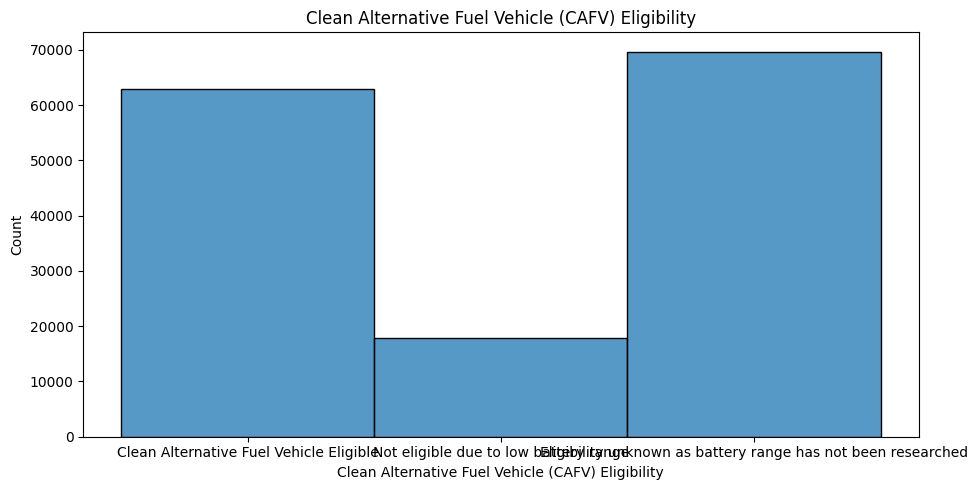

In [44]:
plt.figure(figsize=(10,5))
sns.histplot(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
plt.title('Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.tight_layout()
plt.show()

In [45]:
df['Electric Range'].unique()

array([258,  25, 215,  97, 266,  33, 291,   0,  19, 220, 204,  84,  26,
        13, 249,  38, 103, 322, 125, 330, 222, 239,  73, 259,  75,  20,
       150,  16,  32,  76,  21, 151, 200,  72, 149, 238, 289, 208,  34,
        53,  30,  81, 110, 210,  22,  58,  17,  18,  87,   6,  93, 308,
        14, 107, 293,  35,  47,  23, 153,  68, 270,  42, 233,  31, 234,
        12,  41, 265,  83,  37,  82,  29, 203,  10,  40,  24, 114,  39,
         8, 126, 218,  15, 124, 337, 111,  27, 192, 245,  28, 170,  62,
       100,  48,  56,  95,   9,  36,  11,  51,  57,  59,  74])

In [46]:
#Independance Test Samples. different indexes of each sample => different EVs

#eligible test sample
CAFV =  df_cleaned[df_cleaned['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible']['Electric Range']
CAFV

68        208
70        208
90        208
143        93
149        93
         ... 
150267     32
150274    208
150304     93
150445    208
150468     93
Name: Electric Range, Length: 2399, dtype: int64

In [47]:
#non-eligible test sample
Non_CAFV =  df_cleaned[df_cleaned['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Not eligible due to low battery range']['Electric Range']
Non_CAFV

320       17
429       14
434       14
668       14
762       12
          ..
149786    17
149865    19
150193    17
150296    14
150322    14
Name: Electric Range, Length: 1056, dtype: int64

Perform independant T-test for hypothesis testing
Confindence level Alpha = 0.05

Checking for Normality

Text(0, 0.5, 'Frequency')

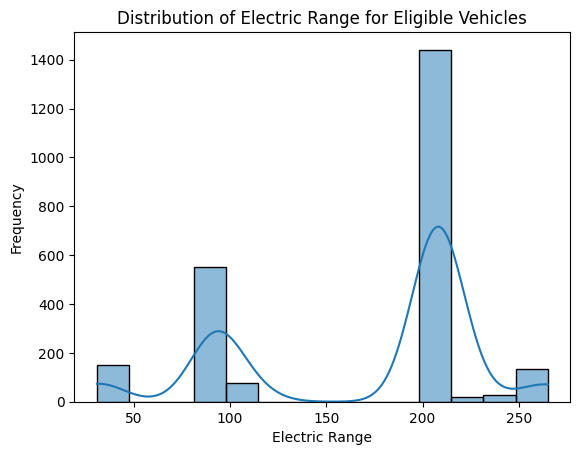

In [48]:
sns.histplot(CAFV, kde=True)
plt.title('Distribution of Electric Range for Eligible Vehicles')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

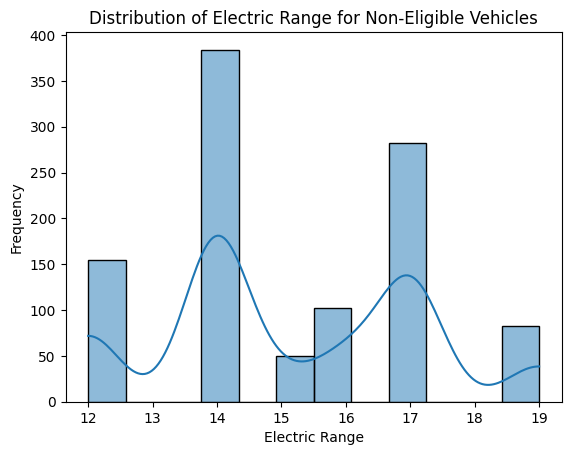

In [49]:
sns.histplot(Non_CAFV, kde=True)
plt.title('Distribution of Electric Range for Non-Eligible Vehicles')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Q-Q Plot for Eligible Vehicles')

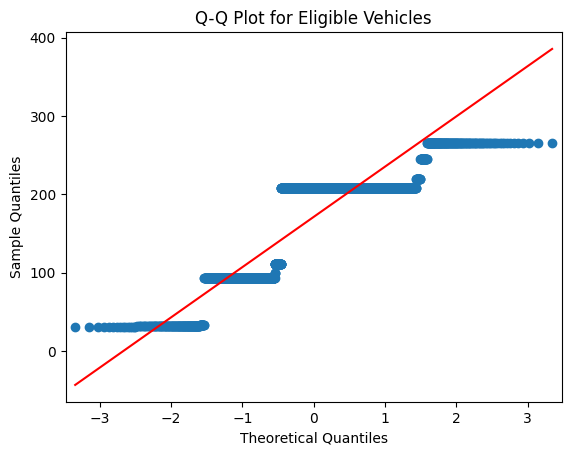

In [50]:
import statsmodels.api as sm


sm.qqplot(CAFV, line='s', ax=plt.gca())
plt.title('Q-Q Plot for Eligible Vehicles')

Text(0.5, 1.0, 'Q-Q Plot for Non-Eligible Vehicles')

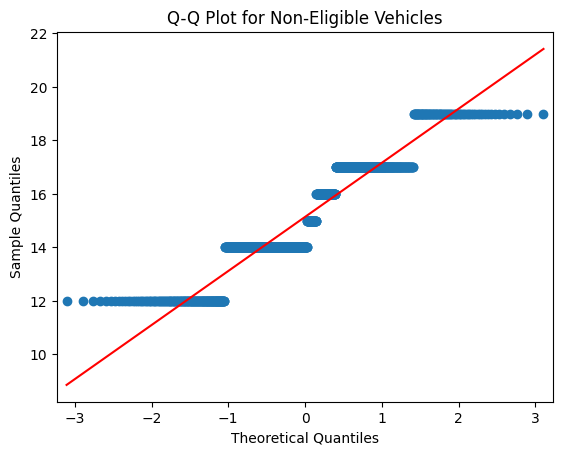

In [51]:
sm.qqplot(Non_CAFV, line='s', ax=plt.gca())
plt.title('Q-Q Plot for Non-Eligible Vehicles')

From the histograms and Q-Q plots for our test samples, we can confirmed we don't have normality distribution in our data sample. We are experiencing clustered distribution. We can assume that we don't have any continuous values in our varaible Electric Range, we have discrete numbers and few clusters due to the fact we have a different types of EVs and models of batteries and targeted ranges from the bateries.

In [52]:
import scipy.stats as stats
stats.ttest_ind(CAFV, Non_CAFV)


TtestResult(statistic=np.float64(79.0531400871559), pvalue=np.float64(0.0), df=np.float64(3453.0))

In [53]:
import scipy.stats as stats

print(f'T-statistic: {stats.ttest_ind(CAFV, Non_CAFV)[0]}')
print(f'P-value: {stats.ttest_ind(CAFV, Non_CAFV)[1]}')

T-statistic: 79.0531400871559
P-value: 0.0


Interpretation of Results

From our independant hypothesis testing of our two samples, we are receiving a results with T-stats for 79 and p-value for 0.0.
Our p-value 0.0 is smaller than our confidence level, so we reject the null hypothesis and accept the alternative hypothesis.

Our alternative hypothesis is -  Clean Alternative Fuel Eligible vehicles have a higher mean electric range than Non-Eligible vehicles

T-statistics for 79 means that we have a large difference between our sample means, which could be from the variarity of our data and it supports our performed test and accepting the alternative hypothesis.


Objective 2 : Model Electric Range as a function of Base MSRP Manufacturer's Suggested Retail Price

Data Preparation



We will use the cleaned data, as the values with 0 will disort our regression analysis.

In [54]:
df_cleaned.head()

VIN (1-10)     County      City State Postal Code  Model Year   Make  \
68   5YJSA1CG3D       King   Seattle    WA       98112        2013  TESLA   
70   5YJSA1DP8D  Snohomish  Stanwood    WA       98292        2013  TESLA   
90   5YJSA1S10E     Kitsap  Kingston    WA       98346        2014  TESLA   
143  KNDJX3AE6G       King  Bellevue    WA       98007        2016    KIA   
149  KNDJX3AE5G       King   Seattle    WA       98144        2016    KIA   

       Model           Electric Vehicle Type  \
68   MODEL S  Battery Electric Vehicle (BEV)   
70   MODEL S  Battery Electric Vehicle (BEV)   
90   MODEL S  Battery Electric Vehicle (BEV)   
143     SOUL  Battery Electric Vehicle (BEV)   
149     SOUL  Battery Electric Vehicle (BEV)   

    Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
68            Clean Alternative Fuel Vehicle Eligible             208   
70            Clean Alternative Fuel Vehicle Eligible             208   
90            Clean Alternative Fuel Vehicle Eligible             208   
143           Clean Alternative Fuel Vehicle Eligible              93   
149           Clean Alternative Fuel Vehicle Eligible              93   

     Base MSRP Legislative District DOL Vehicle ID  \
68       69900                 43.0      113783820   
70       69900                 10.0      111162012   
90       69900                 23.0      184590640   
143      31950                 48.0      349107580   
149      31950                 37.0        3545412   

                    Vehicle Location  \
68      POINT (-122.306935 47.62441)   
70   POINT (-122.3684051 48.2414921)   
90        POINT (-122.50156 47.8019)   
143    POINT (-122.147385 47.599975)   
149     POINT (-122.30823 47.581975)   

                                  Electric Utility 2020 Census Tract  
68    CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)      5.303301e+10  
70                          PUGET SOUND ENERGY INC      5.306105e+10  
90                          PUGET SOUND ENERGY INC      5.303509e+10  
143  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)      5.303302e+10  
149   CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)      5.303301e+10

Checking datatypes of our variables to be numeric


In [55]:
df_cleaned[['Base MSRP', 'Electric Range']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 3455 entries, 68 to 150468
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Base MSRP       3455 non-null   int64
 1   Electric Range  3455 non-null   int64
dtypes: int64(2)
memory usage: 81.0 KB


Text(0, 0.5, 'Electric Range (Miles)')

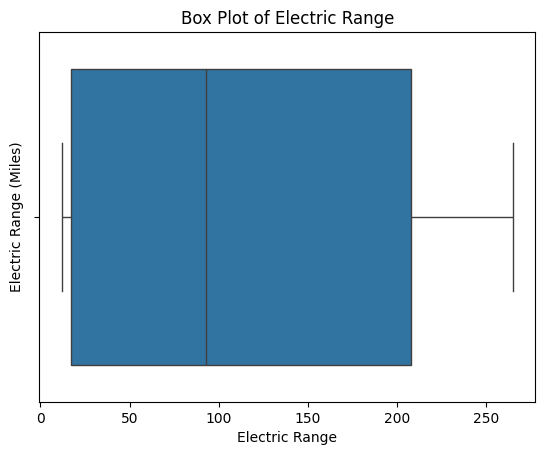

In [56]:
sns.boxplot(x=df_cleaned['Electric Range'])
plt.title('Box Plot of Electric Range')
plt.ylabel('Electric Range (Miles)')

For our regresssion analysis, we will clean the ourlier above 250 ELectric Range as outliers.

Text(0, 0.5, 'Base MSRP ($)')

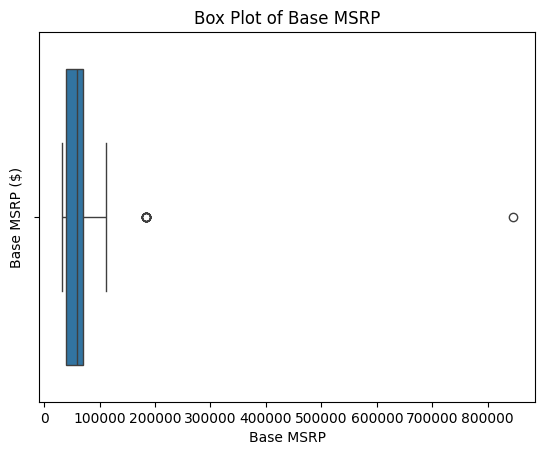

In [57]:
sns.boxplot(x=df_cleaned['Base MSRP'])
plt.title('Box Plot of Base MSRP')
plt.ylabel('Base MSRP ($)')

In our Boxplot visualization we can see clearly outliers around 150K/200K an 850K. These values will be cleaned before we proceeed with regression model, as they will disort our analysis.

In [58]:
df_cleaned = df_cleaned[df_cleaned['Electric Range'] <= 250]
df_cleaned = df_cleaned[df_cleaned['Base MSRP'] <= 150000]

Scatter Plot Visualization for Linear Relationship:

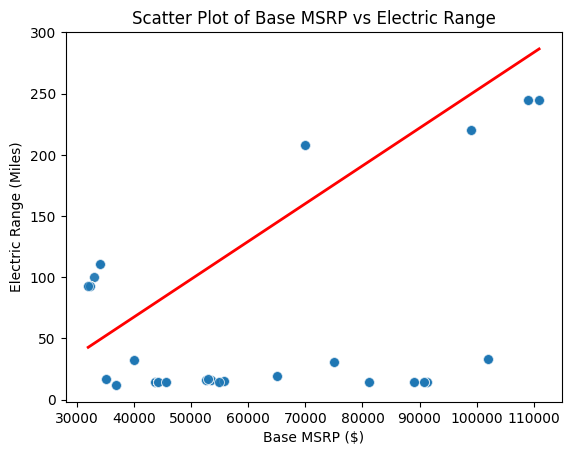

In [59]:
sns.scatterplot(data=df_cleaned, x='Base MSRP', y='Electric Range', alpha=0.6, s=50)
sns.regplot(data=df_cleaned, x='Base MSRP', y='Electric Range',
            scatter=False,
            color='red',
            line_kws={'linestyle': '-', 'linewidth': 2},
            ci=None)
plt.title('Scatter Plot of Base MSRP vs Electric Range')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Electric Range (Miles)')
plt.show()

From the above Scatter Plot visualization, we see a positive linear regression with positive trend. This could be analysed as the more expensive EVs have a longer ELectric Range. We have some clusters of data and not values around the regression line, which is formed by the fact we have clustered data based on the variety of EVs. Our relationship is positive moderate strongs, as we don't have majority of values around the regression line.

Split data for ML Linear Regression Model

In [60]:
#import libraries for Sci-kit Learn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [61]:
#Variable: Dependent Variable (Y): Electric Range (numerical)
#Varible: Independent Variable (X): Base MSRP (numerical)

X = df_cleaned[['Base MSRP']]
y = df_cleaned['Electric Range']

In [62]:
#split Trainig vs Test Data for ML model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train the ML model

In [63]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Print the results from trained model

In [64]:
print("\n--- Regression Model Coefficients ---")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient for Base MSRP: {model.coef_[0]:.4f}")


--- Regression Model Coefficients ---
Intercept: -54.96
Coefficient for Base MSRP: 0.0031


Interpretation of Results:

Intercept is our predicted value Electric Range, when our Base MSRP is 0.
Our Linear Regression Model results as negative intercept, which is not physically real. This coefficient is only for confirming our matematically formula for base value.

Our Coefficient for Base MSRP is 0.0031, which means each unit increase in Base MSRP, the target variable of Electric Range is increasing with 0.0031 miles based on their linear relationship.


Predict the target variable

In [65]:
y_pred = model.predict(X_test)


--- Model Evaluation ---
Mean Absolute Error (MAE): 61.09
Mean Squared Error (MSE): 4588.20
Root Mean Squared Error (RMSE): 67.74
R-squared (R2): 0.3906


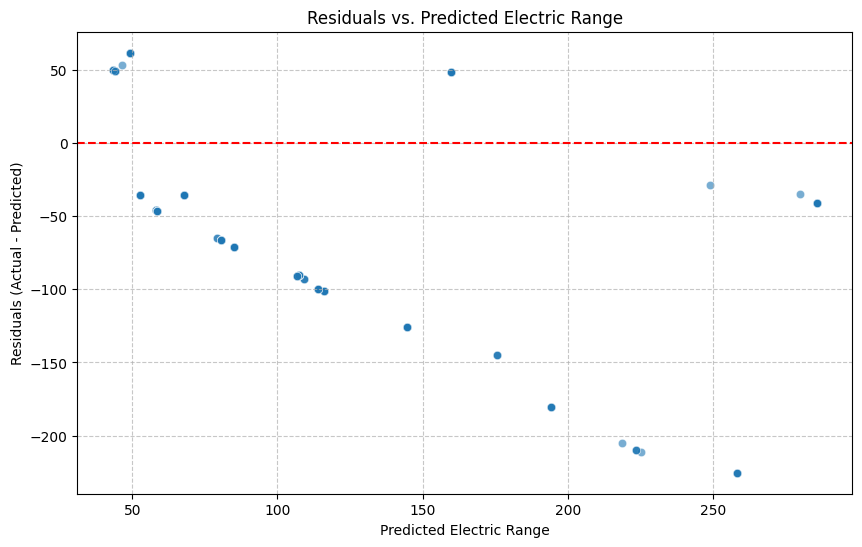

In [67]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.4f}")

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Electric Range')
plt.xlabel('Predicted Electric Range')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Analysis of Results:


The R-squared value of 0.3906 indicates around 39.06% of the variance in Electric Range can be explained by Base MSRP. The rest of approx. 60% could be explained by different factor and relationships.
The Root Mean Squared Error (RMSE) of 67.74 means, on average, our predictions are off by about 67.74 miles from the actual electric range.

Objective 3: How are EVs distributed by type, price, and manufacturer?

Exploratory Visualization of distribtuion of EVs by type, price and manufacturer


In [ ]:
df_cleaned['Electric Vehicle Type'].isnull().sum()

np.int64(0)

In [ ]:
df_cleaned['Make'].isnull().sum()

np.int64(0)

We don't have any Null values in our columns. We are using cleaned df with Base MSRP

<ipython-input-102-a12c64a210fe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Electric Vehicle Type', data=df_cleaned, palette='viridis')


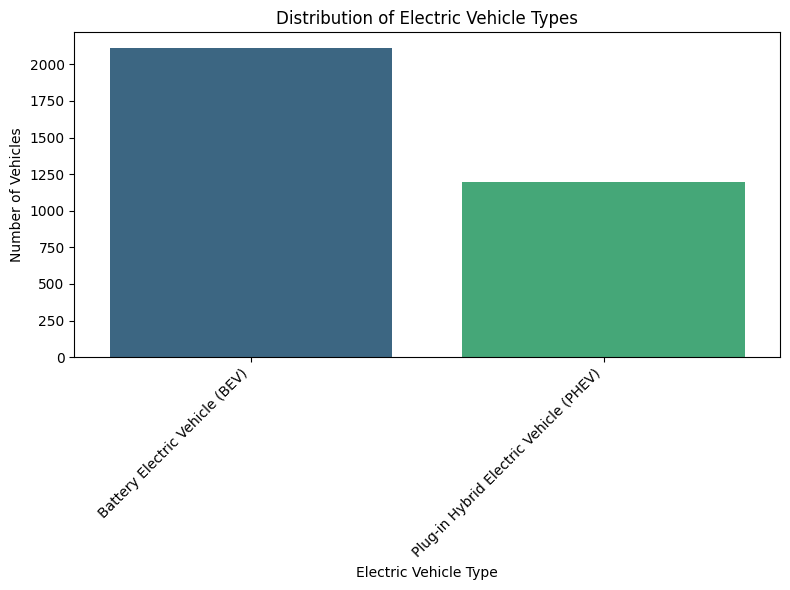

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Electric Vehicle Type', data=df_cleaned, palette='viridis')
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-105-fa421917c164>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_cleaned['Base MSRP'], kde=True, bins=30, palette='magma')


Text(0, 0.5, 'Frequency')

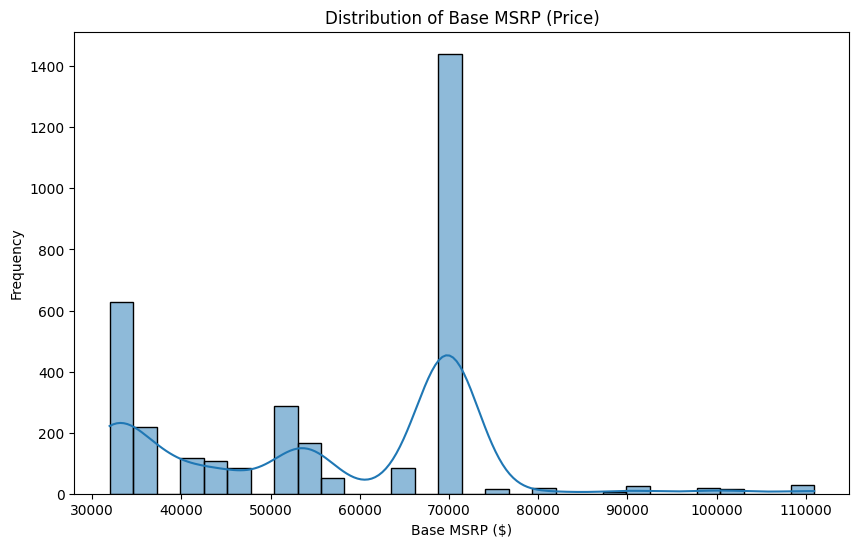

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Base MSRP'], kde=True, bins=30, palette='magma')
plt.title('Distribution of Base MSRP (Price)')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Frequency')

<ipython-input-106-94757e8c208b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.index, y=top_makes.values, palette='crest')


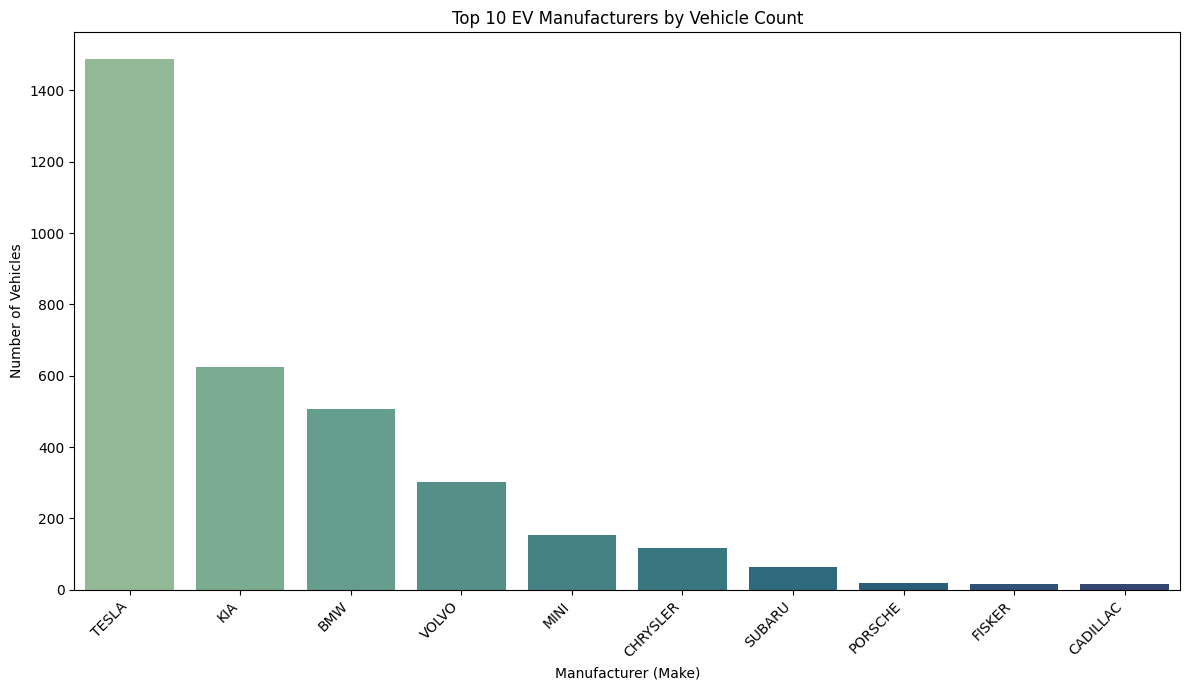

In [ ]:
plt.figure(figsize=(12, 7))
top_makes = df_cleaned['Make'].value_counts().nlargest(10)
sns.barplot(x=top_makes.index, y=top_makes.values, palette='crest')
plt.title('Top 10 EV Manufacturers by Vehicle Count')
plt.xlabel('Manufacturer (Make)')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

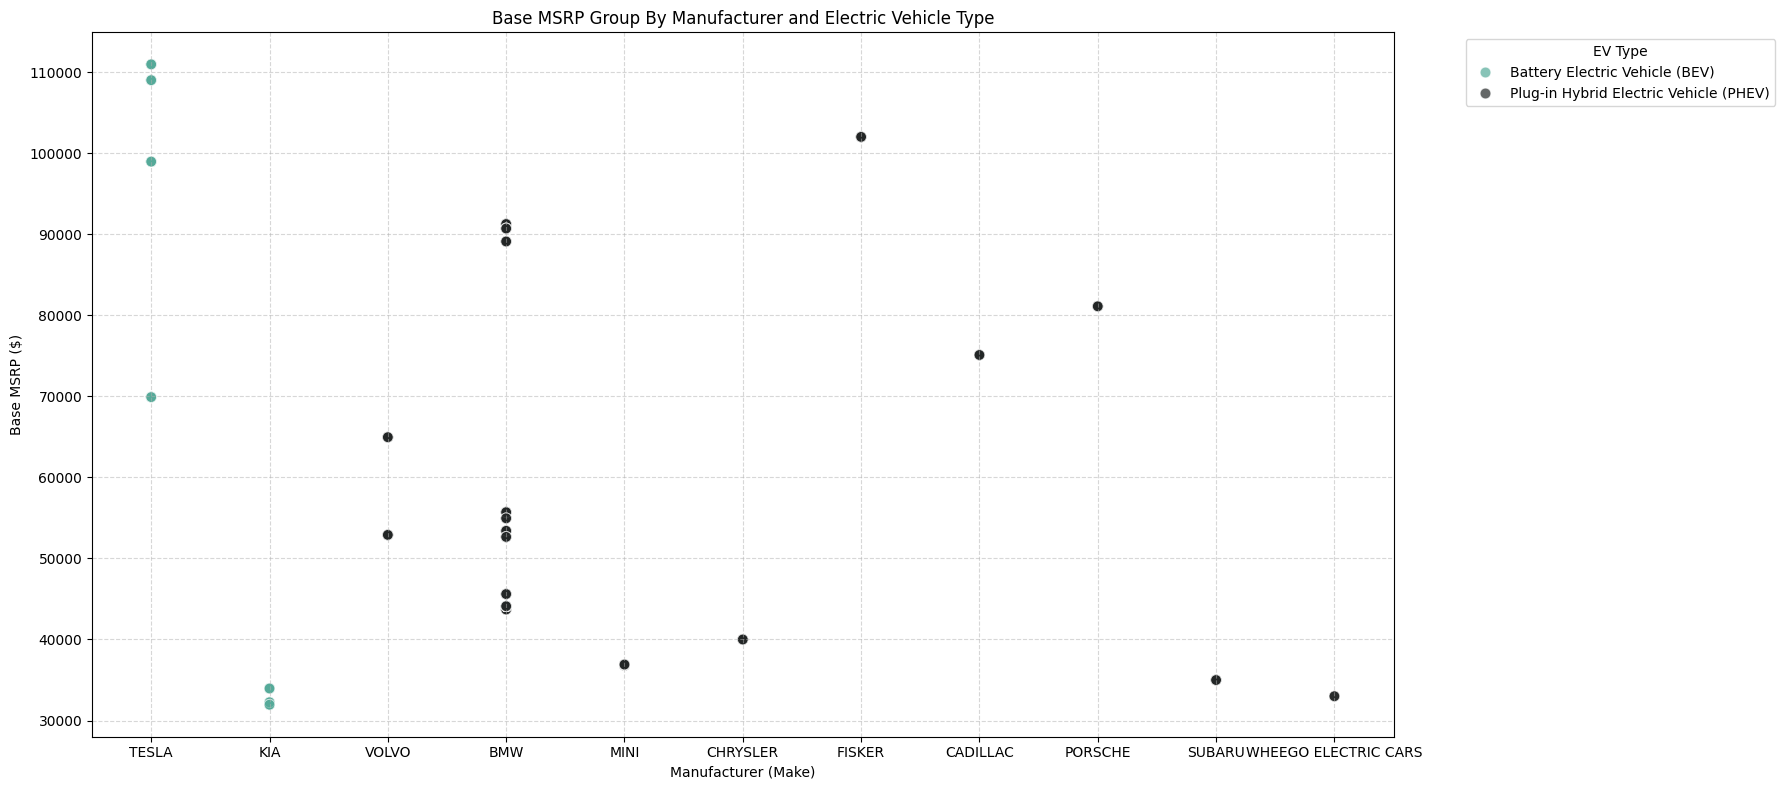

In [ ]:
plt.figure(figsize=(18, 8))
sns.scatterplot(x='Make', y='Base MSRP', hue='Electric Vehicle Type', data=df_cleaned,
                palette='dark:#5A9_r', s=60, alpha=0.7)
plt.title('Base MSRP Group By Manufacturer and Electric Vehicle Type')
plt.xlabel('Manufacturer (Make)')
plt.ylabel('Base MSRP ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='EV Type',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

From our visualization, we are able to see the distribtuion of each feature of our data set.
We have two different type of EVs - Baterry-in and Plug-in
We have variety of manufacturers in our dataset, but we have presented the Top10.
The majority of prices of EVs are around 50K$ - 100K$, which could be seen in our scatter plot as well. We have one outliers, for Porshe, which has price for over 800K$

Unsupervised Machine Learning Algorithm - KMEans for EVs segmentation by Type, Price and Manufacturer

For Our ML Algorith we define
Electric Range as target feature and other columns will be our feauture spaces.

Data Preprocessing

In [ ]:
df_cleaned.head()

VIN (1-10)     County      City State Postal Code  Model Year   Make  \
68   5YJSA1CG3D       King   Seattle    WA       98112        2013  TESLA   
70   5YJSA1DP8D  Snohomish  Stanwood    WA       98292        2013  TESLA   
90   5YJSA1S10E     Kitsap  Kingston    WA       98346        2014  TESLA   
143  KNDJX3AE6G       King  Bellevue    WA       98007        2016    KIA   
149  KNDJX3AE5G       King   Seattle    WA       98144        2016    KIA   

       Model           Electric Vehicle Type  \
68   MODEL S  Battery Electric Vehicle (BEV)   
70   MODEL S  Battery Electric Vehicle (BEV)   
90   MODEL S  Battery Electric Vehicle (BEV)   
143     SOUL  Battery Electric Vehicle (BEV)   
149     SOUL  Battery Electric Vehicle (BEV)   

    Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
68            Clean Alternative Fuel Vehicle Eligible             208   
70            Clean Alternative Fuel Vehicle Eligible             208   
90            Clean Alternative Fuel Vehicle Eligible             208   
143           Clean Alternative Fuel Vehicle Eligible              93   
149           Clean Alternative Fuel Vehicle Eligible              93   

     Base MSRP Legislative District DOL Vehicle ID  \
68       69900                 43.0      113783820   
70       69900                 10.0      111162012   
90       69900                 23.0      184590640   
143      31950                 48.0      349107580   
149      31950                 37.0        3545412   

                    Vehicle Location  \
68      POINT (-122.306935 47.62441)   
70   POINT (-122.3684051 48.2414921)   
90        POINT (-122.50156 47.8019)   
143    POINT (-122.147385 47.599975)   
149     POINT (-122.30823 47.581975)   

                                  Electric Utility 2020 Census Tract  
68    CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)      5.303301e+10  
70                          PUGET SOUND ENERGY INC      5.306105e+10  
90                          PUGET SOUND ENERGY INC      5.303509e+10  
143  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)      5.303302e+10  
149   CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)      5.303301e+10

In [ ]:
df_ml = df_cleaned.copy()

Clean the data with unnessary columns.

In [ ]:
columns_to_drop = [
    'VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model','Clean Alternative Fuel Vehicle (CAFV) Eligibility',
    'Vehicle Location', 'Electric Utility', 'DOL Vehicle ID', '2020 Census Tract','Model Year', 'Electric Range', 'Legislative District'
]

df_kmeans = df_cleaned.drop(columns=columns_to_drop)

In [ ]:
df_kmeans.head()

Make           Electric Vehicle Type  Base MSRP
68   TESLA  Battery Electric Vehicle (BEV)      69900
70   TESLA  Battery Electric Vehicle (BEV)      69900
90   TESLA  Battery Electric Vehicle (BEV)      69900
143    KIA  Battery Electric Vehicle (BEV)      31950
149    KIA  Battery Electric Vehicle (BEV)      31950

Hot encoding of our dataset for data preparation for Kmeans

In [ ]:
df_kmeans_encoded = pd.get_dummies(df_kmeans, drop_first=True)
df_kmeans_encoded.head()

Base MSRP  Make_CADILLAC  Make_CHRYSLER  Make_FISKER  Make_KIA  \
68       69900          False          False        False     False   
70       69900          False          False        False     False   
90       69900          False          False        False     False   
143      31950          False          False        False      True   
149      31950          False          False        False      True   

     Make_MINI  Make_PORSCHE  Make_SUBARU  Make_TESLA  Make_VOLVO  \
68       False         False        False        True       False   
70       False         False        False        True       False   
90       False         False        False        True       False   
143      False         False        False       False       False   
149      False         False        False       False       False   

     Make_WHEEGO ELECTRIC CARS  \
68                       False   
70                       False   
90                       False   
143                      False   
149                      False   

     Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV)  
68                                               False             
70                                               False             
90                                               False             
143                                              False             
149                                              False

Standard Scaling for Kmeans

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_kmeans_encoded)

Defining K with Elbow Method

In [ ]:
from sklearn.cluster import KMeans
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)


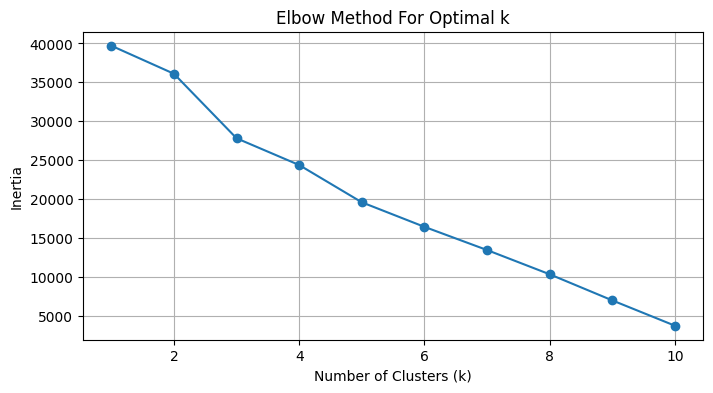

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

From our Elbow Method for defining the optimal K. We can see the inertia of our clusters.
3 Clusters are the optimal K, beacuse the slope after 3 is equally sliding.

Fit the Model

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

In [ ]:
df_kmeans['Cluster'] = kmeans.labels_

In [ ]:
clusters = kmeans.fit_predict(scaled_data)

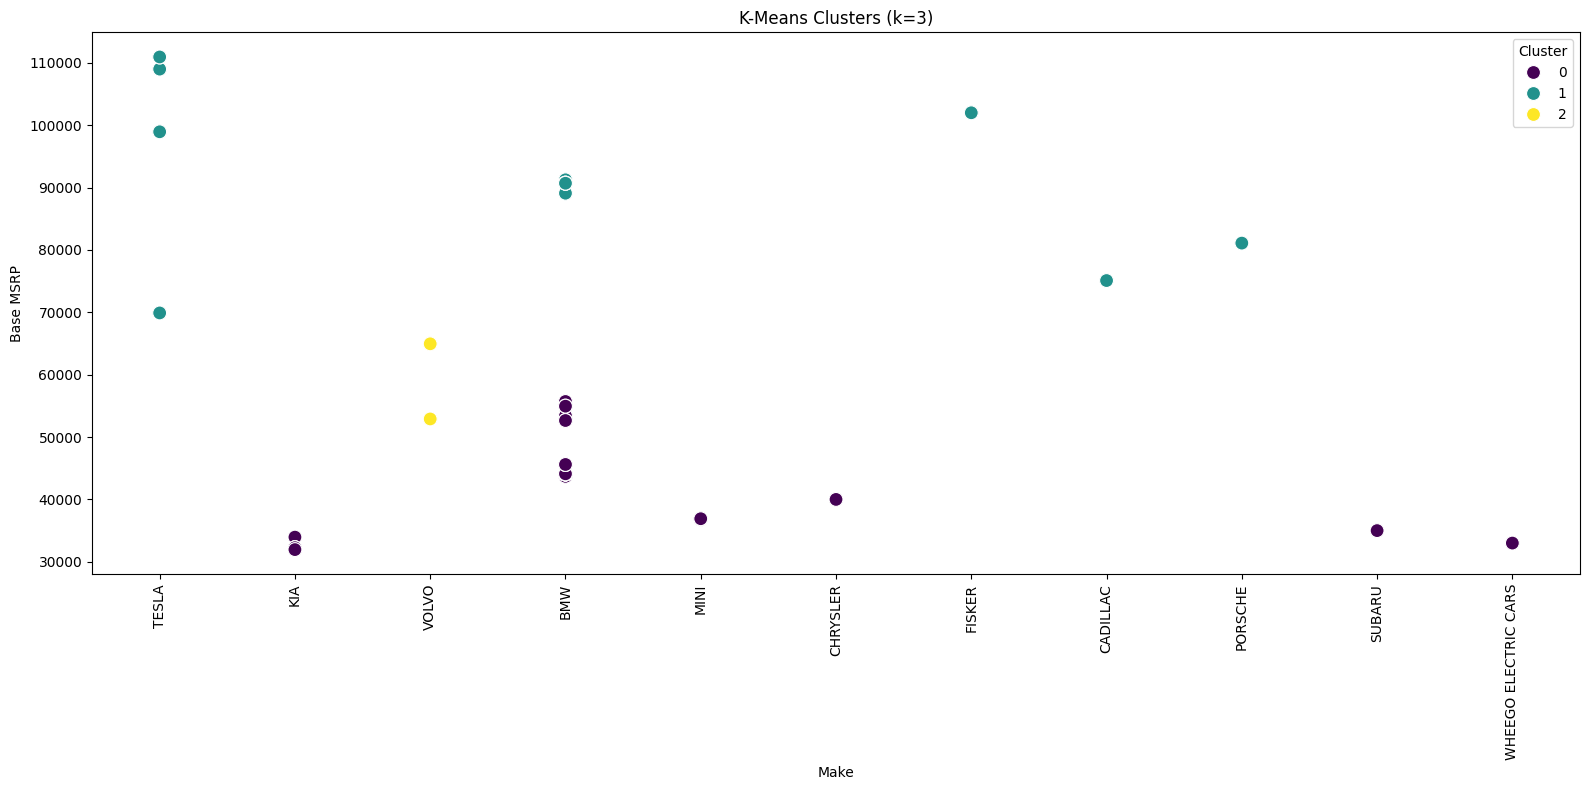

In [ ]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_kmeans,
                x='Make',
                y='Base MSRP',
                hue='Cluster',
                palette='viridis', s=100)

plt.title("K-Means Clusters (k=3)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

From our ML algorithm for EVs segmenatation by Make, price and type we defined 3 optimal clusters, which are presented in above visualization

Cluster 0 - lower-price electric vehicles(KIA, MINI, BMW)

Cluster 1 - higher-price electric vehicles, luxury EV cars (Tesla, Porshe, Cadillac

Cluster 2 - mid-to-upper price range EV cars, not quite luxury cars (Volvo, BMW)


Business Insights:
We can clearly see the prices is a dominant factor for EVs segmantations
Also, the Manufacturers with the biggest brand names (TESLA) is dominanting the market for EVs. Also Porshe with his known name for premium cars is also producing a high-level premium EVs car, which we can see it has price over 800K$
The majority of prices for EVs are in the range of 50K$ to 120K$, which is affordable price for people to buy EVs. This statement could be confirmed also with the production boom from the last three years

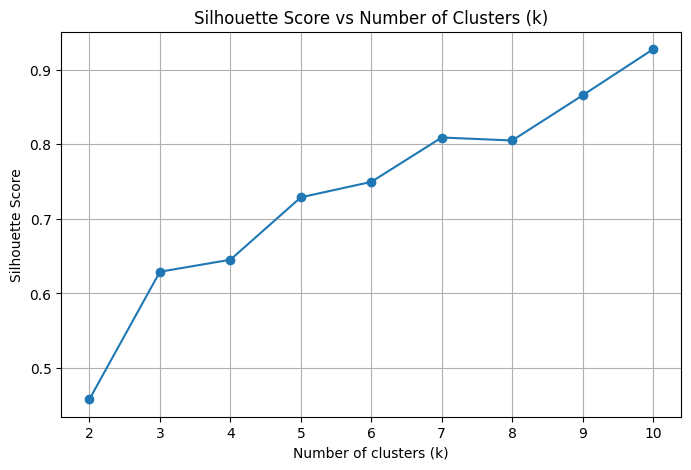

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)

# Step 4: Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters (k)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

Visualization of Silhouette Score presents:

Silhouette Score is in range of -1 to 1 and it represents how the data points are fitted in their assigned clusters.

We can see from the visualization as the number of clusters increases, the sillouette score increases too. We have a peak at 10, which could be interpreted as our optimal clusters. But the optimatl number of clusters of 10 doesn't mean we have a better clusterring. It could be interpretted as overfitting our ML model and created small numbers of clusters, which could be meaningless real-life scenario.

**Conclusions based on my Unsupervised Machine Learning Model - Kmeans**

In my research part for Objective 3: What is the distribution of EVs by type, price and manufacturer, I have applied Machine learning algorith - Kmeans for clustering segmantation. The model performed a clusterign segmentatation of electric vehicles based on Base MSRP, Electric Vehicle Type and Manufacturer.
After the feature engineering and data preprocessing, I have used the Elbow method to define the optimal number of clusters K. I have selected for my purposes K = 3 and defined the following clusters:

1. Cluster 0 grouping economy to mid range vehicles such as KIA and MINI
2. Cluster 1 groups high-end and luxury electric vehicles such as TESLA, Porshe and Cadilac
3. Cluster 2 groups the mid-range to upper-range EVs,covering the gap between affordable EVs and luxury electric cars.

My performance of my ML model for k=3 is silloette score ~ 0.62, which is representing optimal performance of Kmeals model with additional room for improvements.

KMeans Model provides useful and informative view of segmentation of Electric Vehichle Dataset. Further performance tuning and improvement are recommended for more precise and actionable insights.